In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data
market_df = pd.read_csv('market_fact.csv')
customer_df = pd.read_csv('cust_dimen.csv')
product_df = pd.read_csv('prod_dimen.csv')
shipping_df = pd.read_csv('shipping_dimen.csv')
orders_df = pd.read_csv('orders_dimen.csv')

In [3]:
# merge market df with orders to get date columns
df = pd.merge(market_df, orders_df, how='inner', on='Ord_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,27-07-2010,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,27-07-2010,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,27-07-2010,NOT SPECIFIED
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,07-07-2009,HIGH
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,09-11-2010,MEDIUM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
Order_ID               8399 non-null int64
Order_Date             8399 non-null object
Order_Priority         8399 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 918.6+ KB


In [8]:
# convert order_date column from object to datetime datatype
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
Order_ID               8399 non-null int64
Order_Date             8399 non-null datetime64[ns]
Order_Priority         8399 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 918.6+ KB


given that each day multiple orders were made, we we group by order date and compute sum of sales for each day

In [10]:
time_df = df.groupby('Order_Date')['Sales'].sum()
time_df.head()

Order_Date
2009-01-01    1052.8400
2009-01-02    5031.9000
2009-01-03    7288.1375
2009-01-04    6188.4245
2009-01-05    2583.3300
Name: Sales, dtype: float64

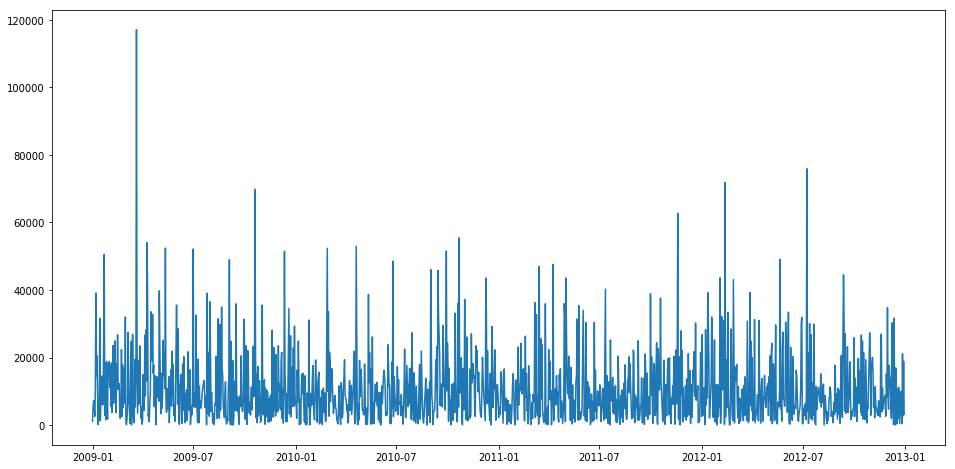

In [13]:
# time series plot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# figure size
plt.figure(figsize=(16, 8))

# ts plot
# sns.tsplot(data=time_df)
sns.lineplot(data=time_df)

### Using Derived Date Metrics (Month, Year)

In [14]:
# extract month
df['month'] = df['Order_Date'].dt.month

df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority,month
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,2010-07-27,NOT SPECIFIED,7
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,2010-07-27,NOT SPECIFIED,7
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,2010-07-27,NOT SPECIFIED,7
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,2009-07-07,HIGH,7
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,2010-09-11,MEDIUM,9


In [15]:
# extract year
df['year'] = df['Order_Date'].dt.year
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority,month,year
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,2010-07-27,NOT SPECIFIED,7,2010
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,2010-07-27,NOT SPECIFIED,7,2010
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,2010-07-27,NOT SPECIFIED,7,2010
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,2009-07-07,HIGH,7,2009
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,2010-09-11,MEDIUM,9,2010


In [17]:
# average sales across years and months
# group by year and month
df_time = df.groupby(['year','month']).Sales.mean()
df_time.head()

year  month
2009  1        1898.475090
      2        2116.510723
      3        2258.661599
      4        2374.155868
      5        1922.317055
Name: Sales, dtype: float64

/home/namrehs/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Sales')

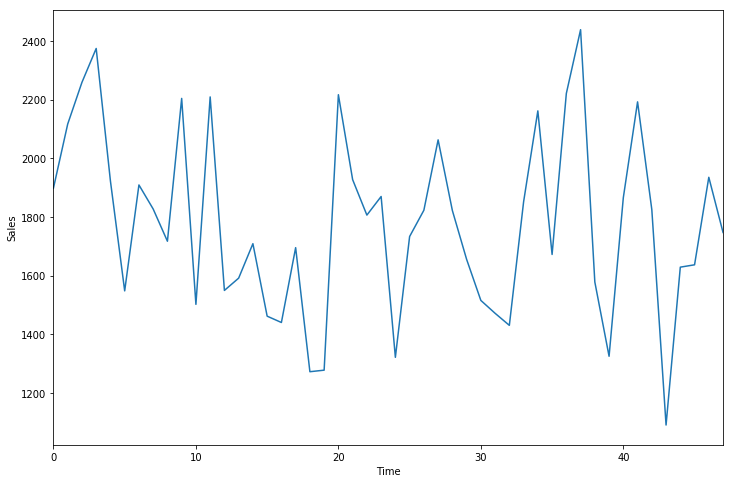

In [23]:
plt.figure(figsize=(12,8))
sns.tsplot(df_time)
plt.xlabel('Time')
plt.ylabel('Sales')

In [25]:
# pivot the data using month
year_month = pd.pivot_table(df, values='Sales', index='year', columns='month', aggfunc='mean')
year_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,1898.475090,2116.510723,2258.661599,2374.155868,1922.317055,1548.093259,1909.084469,1827.095921,1717.295494,2203.961070,1502.192743,2209.047484
2010,1549.664361,1591.532297,1708.934944,1461.935539,1440.393540,1695.397085,1272.653408,1277.917503,2216.599136,1927.250907,1806.324648,1869.720956
2011,1321.671562,1733.378070,1822.860614,2062.716921,1822.033936,1655.599644,1515.576260,1471.700741,1430.616748,1851.404564,2161.479056,1672.187881
2012,2220.831551,2438.166961,1578.284028,1325.253694,1865.744629,2192.228263,1824.935942,1090.950643,1628.963780,1636.951775,1935.183039,1747.047528


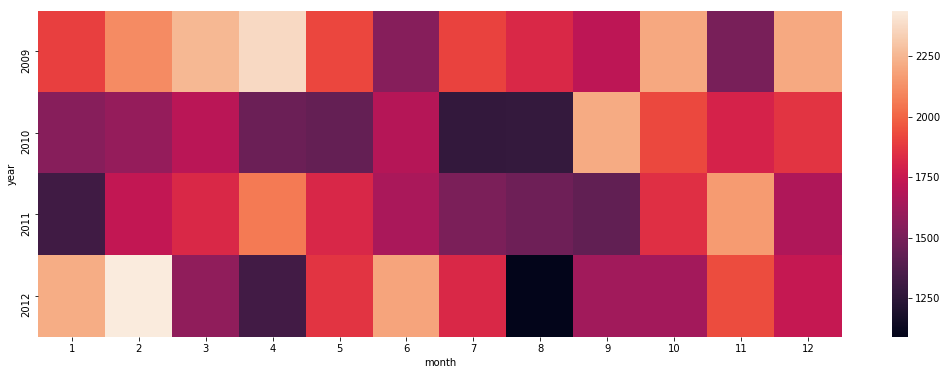

In [30]:
# using heatmap tp visualize the above data
plt.figure(figsize=(18,6))
sns.heatmap(year_month)